<a href="https://colab.research.google.com/github/sagarmahale400/Data-Science-Project-2--Retail/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Sagar Mahale

Project : Retail

DESCRIPTION

Problem Statement:

It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

Dataset Description:

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

Variables	Description
InvoiceNo	Invoice number : Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

StockCode : Product (item) code Nominal, a five digit integral number uniquely assigned to each distinct product

Description : Product (item) name Nominal

Quantity : The quantities of each product (item) per transaction Numeric

InvoiceDate : Invoice Date and time Numeric, the day and time when each 
transaction was generated

UnitPrice : Unit price Numeric, product price per unit in sterling

CustomerID : Customer number Nominal, a six digit integral number uniquely assigned to each customer

Country : Country name Nominal, the name of the country where each customer resides

Project Task 1
Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

In [ ]:
#import the appropriate the libraries
import pandas as pd
import numpy as np

In [ ]:
#Performing the Exploratory Data Analysis 
train_df=pd.read_excel("/content/train.xlsx")

In [ ]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [ ]:
train_df.shape

(379336, 8)

In [ ]:
test_df=pd.read_excel("/content/test.xlsx")

In [ ]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162573 non-null  object        
 1   StockCode    162573 non-null  object        
 2   Description  162082 non-null  object        
 3   Quantity     162573 non-null  int64         
 4   InvoiceDate  162573 non-null  datetime64[ns]
 5   UnitPrice    162573 non-null  float64       
 6   CustomerID   121753 non-null  float64       
 7   Country      162573 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB


In [ ]:
test_df.shape

(162573, 8)

In [ ]:
#Lets merge the two datasets test Test and Train by using the technique called append
retail=train_df.append(test_df)

<ipython-input-10-dc39ad4fc878>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retail=train_df.append(test_df)


In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [ ]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
162568,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom
162569,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland
162570,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom
162571,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom
162572,573359,21983,PACK OF 12 BLUE PAISLEY TISSUES,4,2011-10-30 12:48:00,0.39,14178.0,United Kingdom


In [ ]:
retail.shape

(541909, 8)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


Project Task 1

Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

In [ ]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Replace the missing values or the null values by using fillna() function in the column called Description with a default value
default_value="No description available" 
retail["Description"].fillna(default_value,inplace=True)

In [ ]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# calculate the mean value of the "CustomerID" column
mean_customer_id = retail['CustomerID'].mean()

# fill any missing values in the "CustomerID" column with the mean value
retail['CustomerID'] = retail['CustomerID'].fillna(mean_customer_id)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [ ]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

b. Remove duplicate data records.

In [ ]:
# First checking out the if any duplicate records is available or not.
duplicates=retail.duplicated(subset=["InvoiceNo","StockCode","Description","Quantity","InvoiceDate","UnitPrice","Country"])
duplicate_count=duplicates.value_counts()
print(duplicate_count)

False    536641
True       5268
dtype: int64


In [ ]:
#Remove the duplicates record from the datasets, as there are 5268 duplicate records in the dadasets
retail.drop_duplicates(inplace=True)
print(duplicate_count)

False    536641
True       5268
dtype: int64


As you can see now the duplicates have been removed around 5268 qty from the data sets

In [ ]:
# Changing the datatype of column called InvoiceNo from object to string
retail['InvoiceNo'] = retail['InvoiceNo'].astype(str)

In [ ]:
# Changing the datatype of column called InvoiceNo from object to string
retail['StockCode'] = retail['StockCode'].astype(str)

In [ ]:
# Converting the string(Object) data into the numerical data by using the Encoding techniques
from sklearn.preprocessing import LabelEncoder
#Creating the label encoder object
le=LabelEncoder()
#Now fitting and transforming the InvoiceNo column
retail["InvoiceNo"]=le.fit_transform(retail["InvoiceNo"])
#Now fitting and transforming the StockCode column
retail["StockCode"]=le.fit_transform(retail["StockCode"])

In [ ]:
#Change the datatype object to string type of the column Description
retail["Description"] = retail["Description"].astype(str)

In [ ]:
# By importing the appropriate librarie such as CounterVectorizer basically you can now convert text to integer 
from sklearn.feature_extraction.text import CountVectorizer

# create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# fit the vectorizer to the Description column
vectorizer.fit(retail['Description'])

# transform the Description column into integer vectors
X = vectorizer.transform(retail['Description'])

# print the resulting integer vectors
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# create an instance of the LatentDirichletAllocation class with 10 topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# fit the LDA model to the integer vectors X
lda.fit(X)

# transform X into a lower-dimensional representation using the LDA model
X_lda = lda.transform(X)

# print the resulting shape of X_lda
print(X_lda.shape)

(536641, 10)


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  int64         
 1   StockCode    536641 non-null  int64         
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 36.8+ MB


In [ ]:
#By performing the encoding technique converting the object datatype to integer datatype
le=LabelEncoder()
retail['Country']=le.fit_transform(retail["Country"])

In [ ]:
#Further we are breaking down the InvoiceDate column to sub new columns
retail["Year"]=retail["InvoiceDate"].dt.year.astype(int)
retail["Month"]=retail["InvoiceDate"].dt.month.astype(int)
retail["Day"]=retail["InvoiceDate"].dt.day.astype(int)
retail["Hour"]=retail["InvoiceDate"].dt.hour.astype(int)
retail["Minute"]=retail["InvoiceDate"].dt.minute.astype(int)
retail["Second"]=retail["InvoiceDate"].dt.second.astype(int)

In [ ]:
#Drop the column name called InvoiceDate, as it has broken down into sub columns of integer data type
#retail.drop("InvoiceDate", axis=1, inplace=True)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 162572
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  int64         
 1   StockCode    536641 non-null  int64         
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  int64         
 8   Year         536641 non-null  int64         
 9   Month        536641 non-null  int64         
 10  Day          536641 non-null  int64         
 11  Hour         536641 non-null  int64         
 12  Minute       536641 non-null  int64         
 13  Second       536641 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 61.4+ MB


In [ ]:
#Creating a duplicate copy of data sets
retail_1=retail.copy()

In [ ]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 162572
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  int64         
 1   StockCode    536641 non-null  int64         
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  int64         
 8   Year         536641 non-null  int64         
 9   Month        536641 non-null  int64         
 10  Day          536641 non-null  int64         
 11  Hour         536641 non-null  int64         
 12  Minute       536641 non-null  int64         
 13  Second       536641 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 61.4+ MB


In [ ]:
#Dropping the unwanted column from the data sets
retail_1=retail_1.drop("Description",axis=1)

c. Perform descriptive analytics on the given data.

In [ ]:
#Shows the summary statistics for numerical columns
retail_1.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.0
mean,11637.452703,1651.007717,9.620029,4.632656,15282.803924,34.245781,2010.921771,7.544820,15.024640,13.077154,30.006584,0.0
std,6726.069868,933.311643,219.130156,97.233118,1482.757424,6.246012,0.268532,3.508696,8.663351,2.447505,16.969535,0.0
min,0.000000,0.000000,-80995.000000,-11062.060000,12346.000000,0.000000,2010.000000,1.000000,1.000000,6.000000,0.000000,0.0
25%,5547.000000,966.000000,1.000000,1.250000,14367.000000,36.000000,2011.000000,5.000000,7.000000,11.000000,16.000000,0.0
50%,11945.000000,1563.000000,3.000000,2.080000,15287.690570,36.000000,2011.000000,8.000000,15.000000,13.000000,30.000000,0.0
75%,17462.000000,2175.000000,10.000000,4.130000,16241.000000,36.000000,2011.000000,11.000000,22.000000,15.000000,44.000000,0.0
max,25899.000000,4069.000000,80995.000000,38970.000000,18287.000000,37.000000,2011.000000,12.000000,31.000000,20.000000,59.000000,0.0


In [ ]:
retail_1.nunique()

InvoiceNo      25900
StockCode       4070
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4373
Country           38
Year               2
Month             12
Day               31
Hour              15
Minute            60
Second             1
dtype: int64

Data Transformation:

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

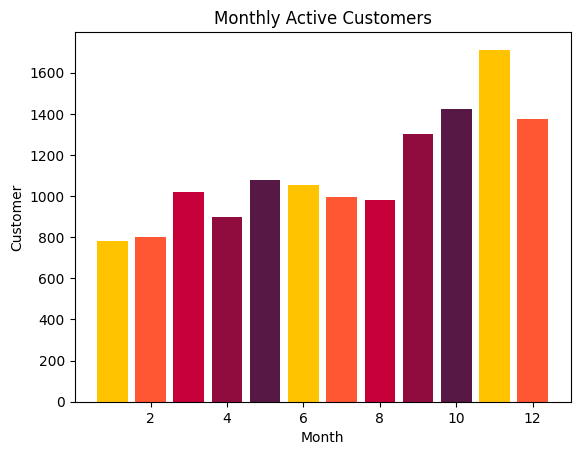

In [ ]:
# Importing the appropriate libraries
import matplotlib.pyplot as plt

# Group the data by month and count the number of unique CustomerIDs in each group
monthly_active = retail_1.groupby("Month")["CustomerID"].nunique()

# Define a list of colors to use for the bars
colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845"]

# Plot a bar chart of the monthly active customers with custom colors and y-axis label
plt.bar(monthly_active.index, monthly_active.values, color=colors)

plt.xlabel("Month")  # set the x-axis label with name
plt.ylabel("Customer")  # set the y-axis label with name
plt.title("Monthly Active Customers")  # set the chart title with appropriate 
plt.show()  # displaying the chart

b. Analyze the retention rate of customers.

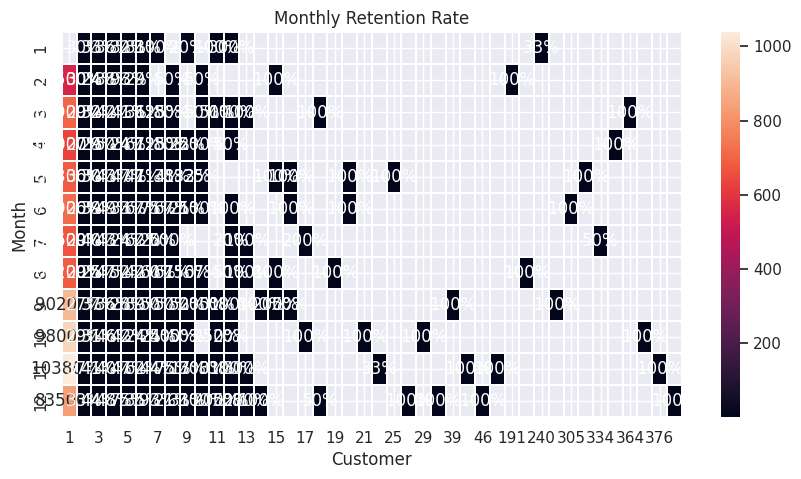

In [ ]:
# Compute monthly retention rate of customers
cohort_data = retail_1.groupby(['Month', 'CustomerID'])['InvoiceNo'].nunique().reset_index()
cohort_counts = cohort_data.groupby(['Month', 'InvoiceNo'])['CustomerID'].nunique().reset_index()
cohort_counts['Retention Rate'] = cohort_counts['CustomerID'] / cohort_counts['CustomerID'].shift()

#Now the retention rate which was calculated can be plotted
#Import the appropriate library for plotting
import seaborn as sns

# Pivot the data to create a heatmap
retention_pivot = cohort_counts.pivot_table(index='Month', columns='InvoiceNo', values='Retention Rate')

# Set the color palette and figure size
sns.set(rc={'figure.figsize':(10,5)})
sns.set_palette("RdYlGn")

# Create the heatmap with annotations
ax = sns.heatmap(data=retention_pivot, annot=True, fmt='.0%', linewidths=0.3)

# Set the axis labels and title
ax.set_xlabel('Customer')
ax.set_ylabel('Month')
ax.set_title('Monthly Retention Rate')
plt.show()


In [ ]:
cohort_counts

,Month,InvoiceNo,CustomerID,Retention Rate
0,1,1,530,NaN
1,1,2,160,0.301887
2,1,3,53,0.331250
3,1,4,19,0.358491
4,1,5,6,0.315789
...,...,...,...,...
166,12,18,1,0.500000
167,12,26,1,1.000000
168,12,34,1,1.000000
169,12,46,1,1.000000


Project Task 2

Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [ ]:
#First creating a new column calle TotalPrice with help of the existing column called Quanity and UnitPrice
retail_1['TotalPrice'] = retail_1['Quantity'] * retail_1['UnitPrice']

In [ ]:
retail_1["TotalPrice"].head()

0     1.25
1    30.00
2     5.10
3     0.85
4    19.50
Name: TotalPrice, dtype: float64

In [ ]:
retail_1['CustomerID'] = retail_1['CustomerID'].astype(int)

In [ ]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 162572
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  int64         
 1   StockCode    536641 non-null  int64         
 2   Quantity     536641 non-null  int64         
 3   InvoiceDate  536641 non-null  datetime64[ns]
 4   UnitPrice    536641 non-null  float64       
 5   CustomerID   536641 non-null  int64         
 6   Country      536641 non-null  int64         
 7   Year         536641 non-null  int64         
 8   Month        536641 non-null  int64         
 9   Day          536641 non-null  int64         
 10  Hour         536641 non-null  int64         
 11  Minute       536641 non-null  int64         
 12  Second       536641 non-null  int64         
 13  TotalPrice   536641 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(11)
memory usage: 61.4 MB


In [ ]:
#First way of performing rfm
# Import necessary libraries
import datetime as dt



# Convert date column to datetime
retail_1['InvoiceDate'] = pd.to_datetime(retail_1['InvoiceDate'])

# Calculate recency, frequency, and monetary value for each customer
snapshot_date = retail_1['InvoiceDate'].max() + dt.timedelta(days=1)
df_rfm = retail_1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                       'InvoiceNo': 'count',
                                       'TotalPrice': 'sum'})

# Rename columns
df_rfm.rename(columns={'InvoiceDate': 'Recency',
                        'InvoiceNo': 'Frequency',
                        'TotalPrice': 'MonetaryValue'},
              inplace=True)


df_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,13,176.60


This code is an implementation of RFM analysis, which is a customer segmentation technique used to identify and group customers based on their buying behavior.

The code calculates three RFM metrics for each customer:

Recency: The number of days since the customer's last purchase. This metric reflects how recently the customer has interacted with the business.

Frequency: The total number of purchases made by the customer. This metric reflects how often the customer interacts with the business.

MonetaryValue: The total amount of money spent by the customer on purchases. This metric reflects how valuable the customer is to the business.

By calculating these metrics for each customer and grouping them based on their values, businesses can identify different customer segments with distinct buying behaviors and preferences. This information can be used to develop targeted marketing and sales strategies to increase customer loyalty and revenue.

The code also renames the columns to make them more descriptive and easier to work with. The resulting dataframe, 'rfm', contains the RFM metrics for each customer and can be used for further analysis and segmentation

The 'rfm' dataframe displays the RFM metrics for each customer, with each row representing a unique customer and the columns representing the Recency, Frequency, and MonetaryValue metrics, respectively.

For example, the first row of the dataframe corresponds to customer ID 12347.0, who made 2 purchases in total (Frequency=182), but hasn't made a purchase in 325 days (Recency=1) and has spent a total of 0.00 monetary units (MonetaryValue=4310.00).

The other rows of the dataframe represent the RFM metrics for the other customers in the dataset, with each row providing a snapshot of that customer's behavior and value to the business.

2. Calculate RFM metrics.


This part of the code is used to calculate the weighted RFM scores for each customer. The idea behind this is to give different weights to each of the RFM metrics based on their relative importance to the business, and then combine them into a single score that reflects the overall value of the customer.


In [ ]:
# Create quantiles for RFM scores
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])

# Define functions to calculate RFM scores
def r_score(x, c):
    if x <= c['Recency'][0.25]:
        return 4
    elif x <= c['Frequency'][0.5]:
        return 3
    elif x <= c['MonetaryValue'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= c[0.25]:
        return 1
    elif x <= c[0.5]:
        return 2
    elif x <= c[0.75]:
        return 3
    else:
        return 4

# Calculate RFM scores for each customer
df_rfm['R'] = df_rfm['Recency'].apply(r_score, args=(quantiles,))
df_rfm['F'] = df_rfm['Frequency'].apply(fm_score, args=(quantiles['Frequency'],))
df_rfm['M'] = df_rfm['MonetaryValue'].apply(fm_score, args=(quantiles['MonetaryValue'],))

# Combine RFM scores into a single string
df_rfm['RFM'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)




b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [ ]:
# Assign segments based on RFM score
segment_map = {
    '444': 'Champions',
    '344': 'Loyal Customers',
    '434': 'Potential Loyalists',
    '334': 'Recent Customers',
    '444': 'Promising Customers',
    '243': 'Customers Needing Attention',
    '143': 'About To Sleep',
    '241': 'At Risk',
    '142': 'Can\'t Lose Them',
    '111': 'Hibernating'
}

df_rfm['Segment'] = df_rfm['RFM'].map(segment_map)

df_rfm.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM,Segment
CustomerID,,,,,,,,
12346,326,2,0.00,2,1,1,211,NaN
12347,2,182,4310.00,4,4,4,444,Promising Customers
12348,75,31,1797.24,2,2,4,224,NaN
12349,19,73,1757.55,3,3,4,334,Recent Customers
12350,310,17,334.40,2,1,2,212,NaN


In [ ]:
#Second way of performing the rfm
import datetime as dt
# Set the date range for the data
end_date = max(retail_1['InvoiceDate'])
start_date = end_date - dt.timedelta(days=365)

# Calculate RFM metrics for each customer
rfm = retail_1.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (end_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})

# Rename the columns
rfm.rename(columns={'InvoiceDate': 'Recency',
                     'InvoiceNo': 'Frequency',
                     'TotalPrice': 'MonetaryValue'},
           inplace=True)
# Create a dictionary to store the metrics and the corresponding weight
metrics = {'Recency': [1, 'max'], 
           'Frequency': [1, 'sum'],
           'MonetaryValue': [1, 'sum']}

# Calculate the weighted RFM scores for each customer
for metric in metrics.keys():
    weight, func = metrics[metric]
    rfm[metric + '_Score'] = rfm[metric].apply(func)
    rfm[metric + '_Score'] = (rfm[metric + '_Score'] / rfm[metric + '_Score'].max()) * weight
# Divide the metrics into quartiles and assign a score from 1 to 4
for metric in metrics.keys():
    rfm[metric + '_Quartile'] = pd.qcut(rfm[metric], 4, labels=False) + 1
    rfm[metric + '_Score'] = 4 - rfm[metric + '_Quartile'] + 1

# Combine the scores to get an RFM segment
rfm['RFM_Segment'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['MonetaryValue_Score'].astype(str)

# Calculate the RFM score by adding up the three ratings
rfm['RFM_Score'] = rfm['Recency_Score'] + rfm['Frequency_Score'] + rfm['MonetaryValue_Score']
# Summarize the RFM segments and calculate the average monetary value for each segment
rfm_summary = rfm.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'RFM_Score': 'mean'})

# Print the summary
print(rfm_summary)

# Comment on the findings
# The "111" segment consists of the most valuable customers who are recent, frequent, and big spenders.
# The "444" segment consists of the least valuable customers who are not recent, infrequent, and low spenders.
# The company can focus on retaining the "111" segment and re-engaging the "311" and "411" segments.


                Recency   Frequency  MonetaryValue  RFM_Score
RFM_Segment                                                  
111          203.350000  181.550000    2974.341550        3.0
112          204.250000  146.458333    1100.051250        4.0
113          199.333333  116.000000     496.800000        5.0
121          215.357143   71.214286    3125.717143        4.0
122          206.569231   61.969231    1001.748154        5.0
...                 ...         ...            ...        ...
434            8.227273   28.318182     195.185909       11.0
441            4.333333    6.000000    7743.913333        9.0
442            9.166667   11.583333    1054.214167       10.0
443            7.454545   11.227273     411.531364       11.0
444            8.264706    8.705882     161.151912       12.0

[62 rows x 4 columns]


Project Task: Week 3
Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [ ]:
rfm_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 111 to 444
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        62 non-null     float64
 1   Frequency      62 non-null     float64
 2   MonetaryValue  62 non-null     float64
 3   RFM_Score      62 non-null     float64
dtypes: float64(4)
memory usage: 2.4+ KB


In [ ]:
rfm_summary.isnull().sum()

Recency          0
Frequency        0
MonetaryValue    0
RFM_Score        0
dtype: int64

In [ ]:
rfm_summary.shape

(62, 4)

In [ ]:
rfm_summary.head()

,Recency,Frequency,MonetaryValue,RFM_Score
RFM_Segment,,,,
111,203.350000,181.550000,2974.341550,3.0
112,204.250000,146.458333,1100.051250,4.0
113,199.333333,116.000000,496.800000,5.0
121,215.357143,71.214286,3125.717143,4.0
122,206.569231,61.969231,1001.748154,5.0


In [ ]:
rfm_summary.tail()

,Recency,Frequency,MonetaryValue,RFM_Score
RFM_Segment,,,,
434,8.227273,28.318182,195.185909,11.0
441,4.333333,6.000000,7743.913333,9.0
442,9.166667,11.583333,1054.214167,10.0
443,7.454545,11.227273,411.531364,11.0
444,8.264706,8.705882,161.151912,12.0


In [ ]:
rfm_summary.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,62.000000,62.000000,6.200000e+01,62.000000
mean,86.395198,70.851316,1.476604e+03,7.516129
std,88.223946,94.784279,2.011297e+03,1.973114
min,4.000000,6.000000,-7.105427e-15,3.000000
25%,14.456461,15.153186,4.059599e+02,6.000000
50%,45.230769,32.055070,8.759514e+02,7.500000
75%,90.302249,76.508772,2.166780e+03,9.000000
max,263.753181,654.865957,1.192301e+04,12.000000


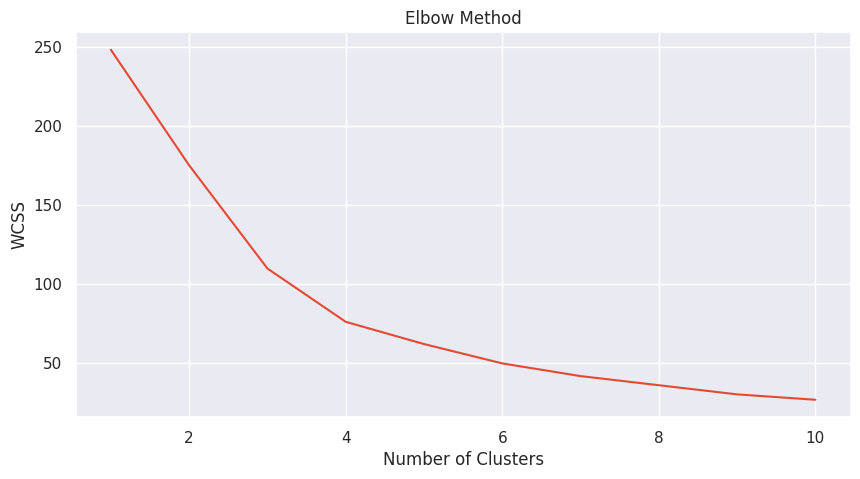

In [ ]:
#importing the apprpriate libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# select the relevant columns for the clustering task
df1 = rfm_summary[['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score']].head(62)

#Performing the standard scaler technique
from sklearn.preprocessing import StandardScaler
df1 = pd.DataFrame(StandardScaler().fit_transform(df1))

# determine the optimal number of clusters using the Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

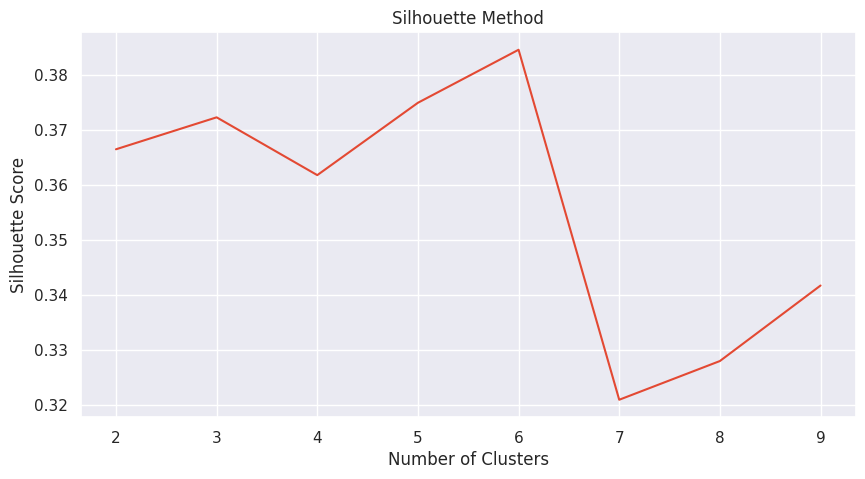

In [ ]:
# determine the optimal number of clusters using the Silhouette method
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    score = silhouette_score(df1, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    score = silhouette_score(df1, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Silhouette score for {i} clusters: {score}')

Silhouette score for 2 clusters: 0.36644078177352
Silhouette score for 3 clusters: 0.37225594551366015
Silhouette score for 4 clusters: 0.36173892216611914
Silhouette score for 5 clusters: 0.374905119449605
Silhouette score for 6 clusters: 0.3845532549309504
Silhouette score for 7 clusters: 0.3208666005461056
Silhouette score for 8 clusters: 0.3279096875247741
Silhouette score for 9 clusters: 0.34165006065647946


In [ ]:
# perform k-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df1)

In [ ]:
df1 = rfm_summary[['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score']].head(62)
df1['Cluster'] = pred_y

In [ ]:
df1.head(62)

,Recency,Frequency,MonetaryValue,RFM_Score,Cluster
RFM_Segment,,,,,
111,203.350000,181.550000,2974.341550,3.0,0
112,204.250000,146.458333,1100.051250,4.0,0
113,199.333333,116.000000,496.800000,5.0,0
121,215.357143,71.214286,3125.717143,4.0,0
122,206.569231,61.969231,1001.748154,5.0,0
...,...,...,...,...,...
434,8.227273,28.318182,195.185909,11.0,0
441,4.333333,6.000000,7743.913333,9.0,1
442,9.166667,11.583333,1054.214167,10.0,0


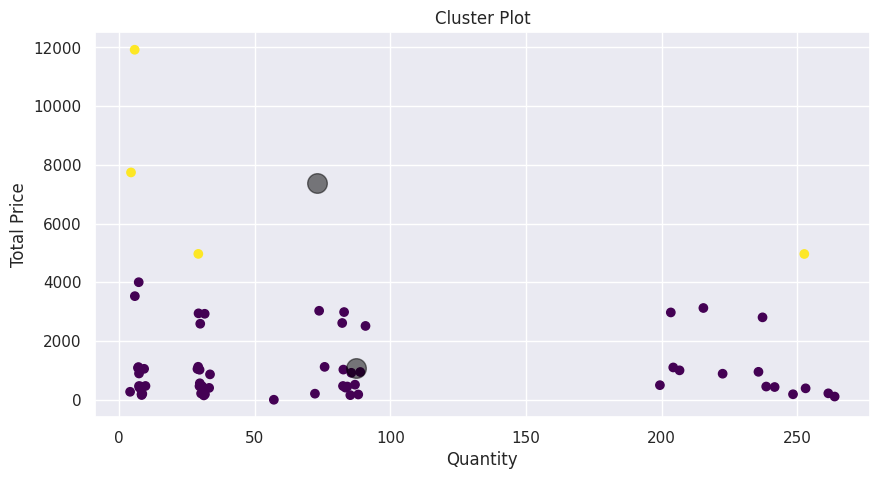

In [ ]:
# plot the clusters
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 2], c=pred_y, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title('Cluster Plot')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

<Axes: xlabel='Cluster', ylabel='MonetaryValue'>

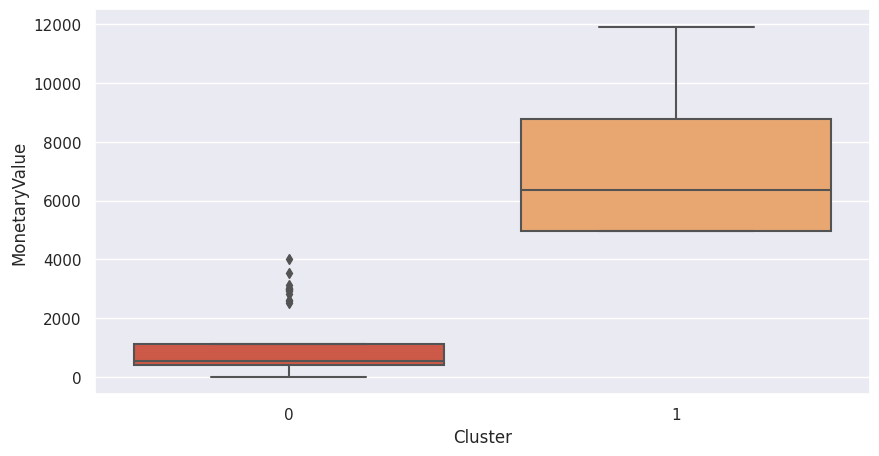

In [ ]:
sns.boxplot(x='Cluster', y='MonetaryValue', data=df1)

<Axes: xlabel='Cluster', ylabel='Frequency'>

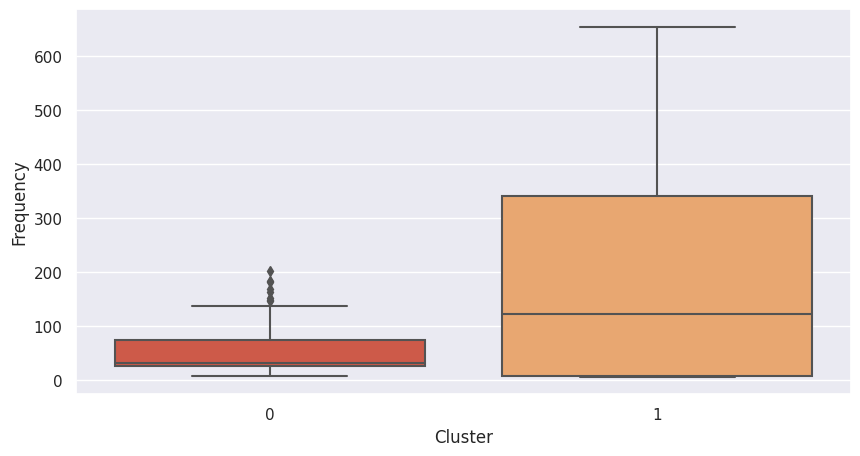

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=df1)

<Axes: xlabel='Cluster', ylabel='Recency'>

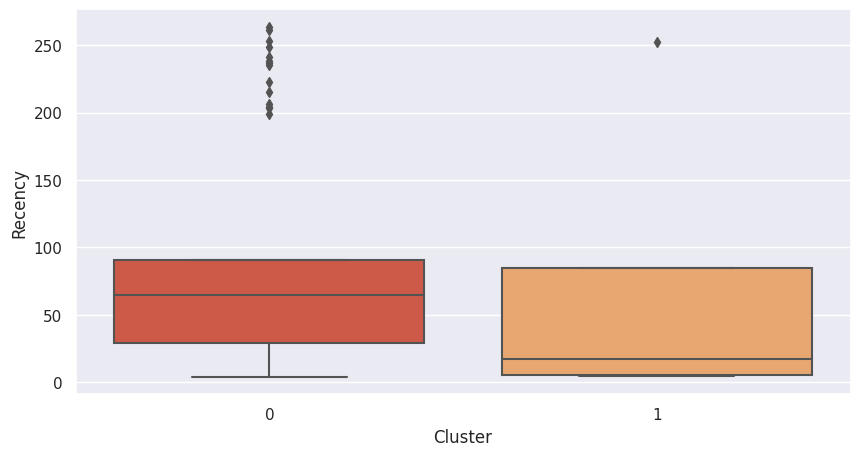

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=df1)